In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('titanic_all_numeric.csv').astype('float32').dropna()
predictors = data.drop('survived', axis=1).values
n_cols = predictors.shape[1]
input_shape = (n_cols,)
target = to_categorical(data['survived'].values)

In [5]:
# Changing optimization parameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create unoptimized model
def get_new_model(input_shape=input_shape):
  model = Sequential([
    Dense(100, activation='relu', input_shape=input_shape),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
  ])
  
  return model

# Create list of learning rates
lr_to_test = [.000001, .01, 1]

for lr in lr_to_test:
  print(f"\n\nTesting model with learning rate {lr}\n")
  # New model unaffected by previous models
  model = get_new_model()
  # Create SGD optimizer with specified learning rate
  my_optimizer = SGD(learning_rate=lr)
  model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
  model.fit(predictors, target)



Testing model with learning rate 1e-06



2021-11-14 23:44:54.868811: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-14 23:44:54.868960: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-14 23:44:54.869023: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-FC4EGDV): /proc/driver/nvidia/version does not exist
2021-11-14 23:44:54.869701: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-14 23:44:55.247865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLI

28/28 [==============================] - 1s 3ms/step - loss: 2.4245


Testing model with learning rate 0.01

28/28 [==============================] - 1s 3ms/step - loss: 1.5376


Testing model with learning rate 1

28/28 [==============================] - 1s 2ms/step - loss: 2670.7185


In [6]:
model = Sequential([
  Dense(100, activation='relu', input_shape=input_shape),
  Dense(100, activation='relu'),
  Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(predictors, target, validation_split=.3, epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 18ms/step - loss: 1.0658 - accuracy: 0.5923 - val_loss: 0.7982 - val_accuracy: 0.6716
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.7648 - accuracy: 0.6421 - val_loss: 0.6457 - val_accuracy: 0.7201
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6971 - accuracy: 0.6276 - val_loss: 0.6566 - val_accuracy: 0.6679
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.7368 - accuracy: 0.6324 - val_loss: 0.6298 - val_accuracy: 0.6828
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6384 - accuracy: 0.6517 - val_loss: 0.5516 - val_accuracy: 0.7612
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6477 - accuracy: 0.6822 - val_loss: 0.6774 - val_accuracy: 0.6978
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6708 - accuracy: 0.6870 - val_loss: 0.5093 - val_accuracy: 0.7351
Epoch 8/10
20/20 [=

In [8]:
# Early stopping: Optimizing the optimization
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential([
  Dense(100, activation='relu', input_shape=input_shape),
  Dense(100, activation='relu'),
  Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 1s 16ms/step - loss: 1.9788 - accuracy: 0.5393 - val_loss: 0.7465 - val_accuracy: 0.6716
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7245 - accuracy: 0.6404 - val_loss: 0.5543 - val_accuracy: 0.7500
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.6677 - val_loss: 0.5996 - val_accuracy: 0.6604
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6758 - val_loss: 0.5361 - val_accuracy: 0.7388
Epoch 5/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6950 - val_loss: 0.5223 - val_accuracy: 0.7612
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5874 - accuracy: 0.6838 - val_loss: 0.5483 - val_accuracy: 0.7836
Epoch 7/30
20/20 [==============================] - 0s 6ms/step - loss: 0.5948 - accuracy: 0.7047 - val_loss: 0.5357 - val_accuracy: 0.7201


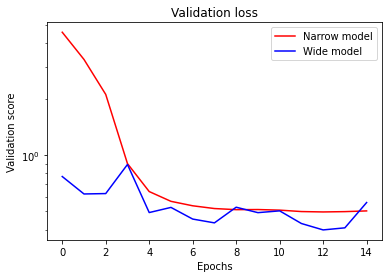

In [18]:
# Experimenting with wider networks
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=5)

# Narrow model
model_1 = Sequential([
  Dense(10, activation='relu', input_shape=input_shape),
  Dense(10, activation='relu'),
  Dense(2, activation='softmax')
])

# Wide model
model_2 = Sequential([
  Dense(100, activation='relu', input_shape=input_shape),
  Dense(100, activation='relu'),
  Dense(2, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Plot training histories
plt.plot(model_1_training.history['val_loss'], 'r', label='Narrow model')
plt.plot(model_2_training.history['val_loss'], 'b', label='Wide model')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.yscale('log')
plt.legend()
plt.show()

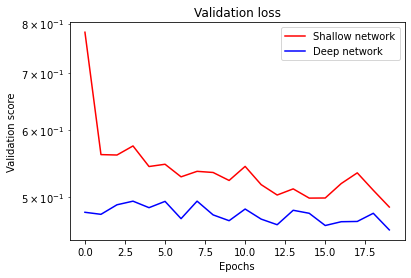

In [20]:
# Adding layers to a network

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=5)

# Shallow network
model_1 = Sequential([
  Dense(50, activation='relu', input_shape=input_shape),
  Dense(2, activation='softmax')
])

# Deep network
model_2 = Sequential([
  Dense(50, activation='relu', input_shape=input_shape),
  Dense(50, activation='relu'), 
  Dense(50, activation='relu'),
  Dense(2, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)
model_2_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Plot training history
plt.plot(model_1_training.history['val_loss'], 'r', label='Shallow network')
plt.plot(model_2_training.history['val_loss'], 'b', label='Deep network')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.yscale('log')
plt.legend()
plt.show()

In [31]:
# MNIST data
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('mnist.csv', header=None)
target = to_categorical(data[0])
predictors = data.drop(0, axis=1).values
n_cols = predictors.shape[1]
input_shape=(n_cols,)

In [34]:
# Building a digit recognition model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
  Dense(50, activation='relu', input_shape=input_shape),
  Dense(50, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3, epochs=10)

Epoch 1/10
44/44 [==============================] - 1s 11ms/step - loss: 22.5683 - accuracy: 0.3729 - val_loss: 7.8077 - val_accuracy: 0.5624
Epoch 2/10
44/44 [==============================] - 0s 5ms/step - loss: 4.7221 - accuracy: 0.6579 - val_loss: 4.8086 - val_accuracy: 0.6373
Epoch 3/10
44/44 [==============================] - 0s 11ms/step - loss: 2.3050 - accuracy: 0.7736 - val_loss: 4.0797 - val_accuracy: 0.6922
Epoch 4/10
44/44 [==============================] - 0s 10ms/step - loss: 1.4090 - accuracy: 0.8164 - val_loss: 3.5174 - val_accuracy: 0.7354
Epoch 5/10
44/44 [==============================] - 0s 9ms/step - loss: 0.8768 - accuracy: 0.8779 - val_loss: 3.4571 - val_accuracy: 0.7338
Epoch 6/10
44/44 [==============================] - 0s 8ms/step - loss: 0.5258 - accuracy: 0.9071 - val_loss: 3.2444 - val_accuracy: 0.7288
Epoch 7/10
44/44 [==============================] - 0s 7ms/step - loss: 0.3679 - accuracy: 0.9221 - val_loss: 3.0095 - val_accuracy: 0.7720
Epoch 8/10
44/44